In [1]:
from libs.search import *
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

In [51]:
def plot_NQueens(solution, fig=None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()

In [52]:
def conflicts(state):
    n = len(state)
    conflicts = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
                
    return conflicts

def successor(state):
    successors = []
    n = len(state)
    
    for i in range(n):
        for j in range(n):
            if j != state[i]:
                successor_state = list(state)
                successor_state[i] = j
                successors.append(successor_state)
                
    return successors


C:\Users\gamer\AppData\Local\Temp\ipykernel_2684\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


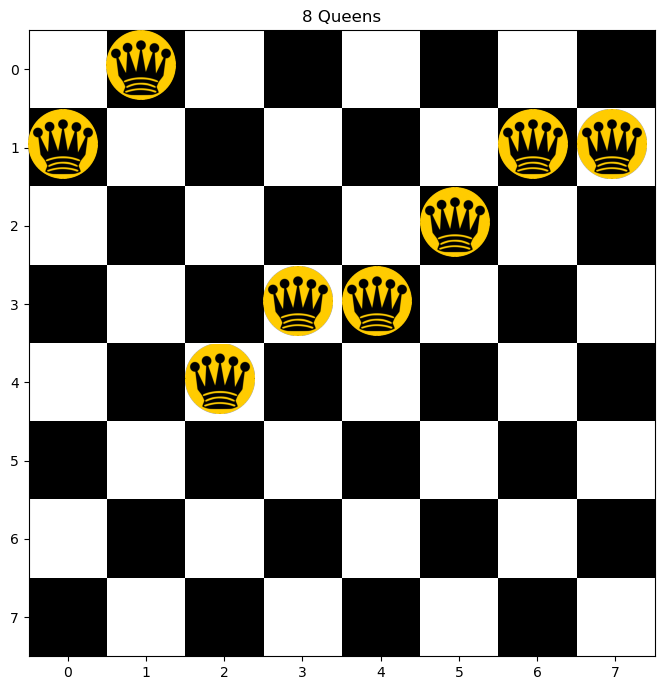

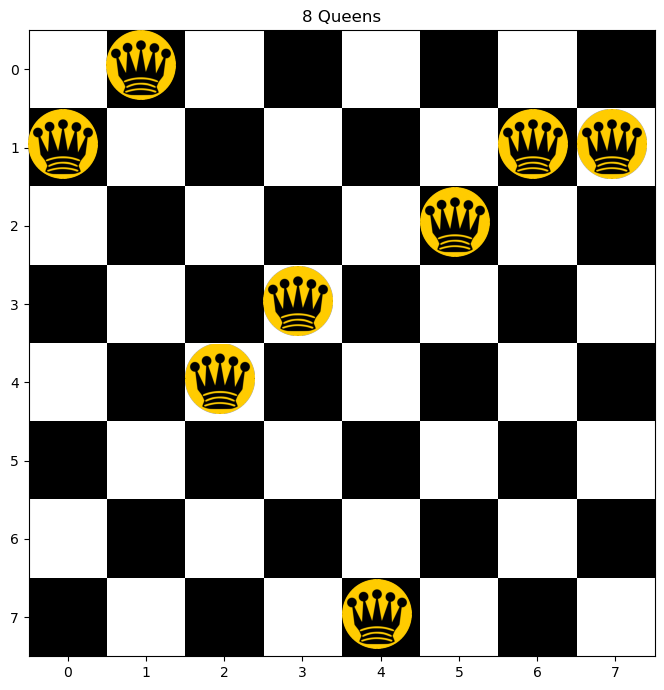

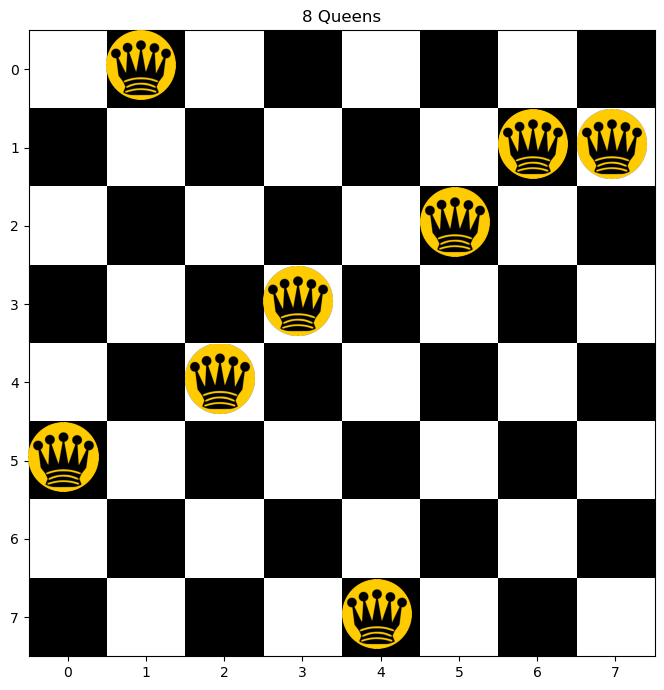

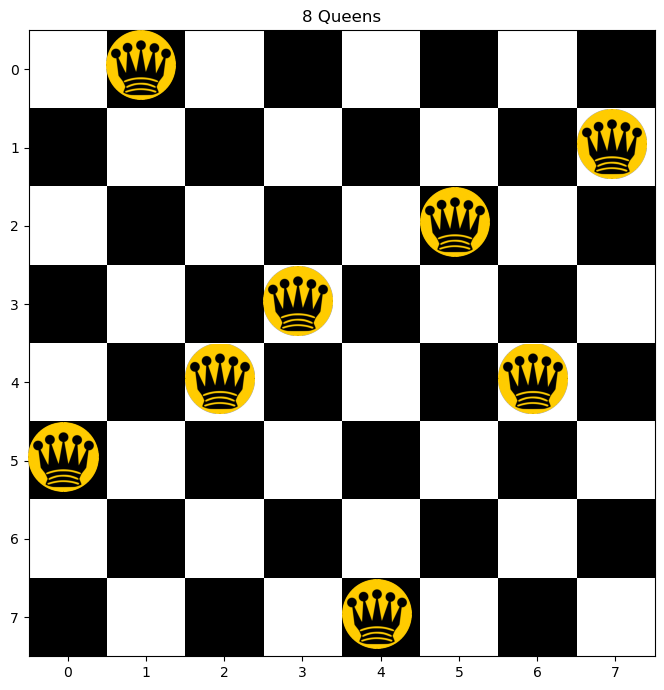

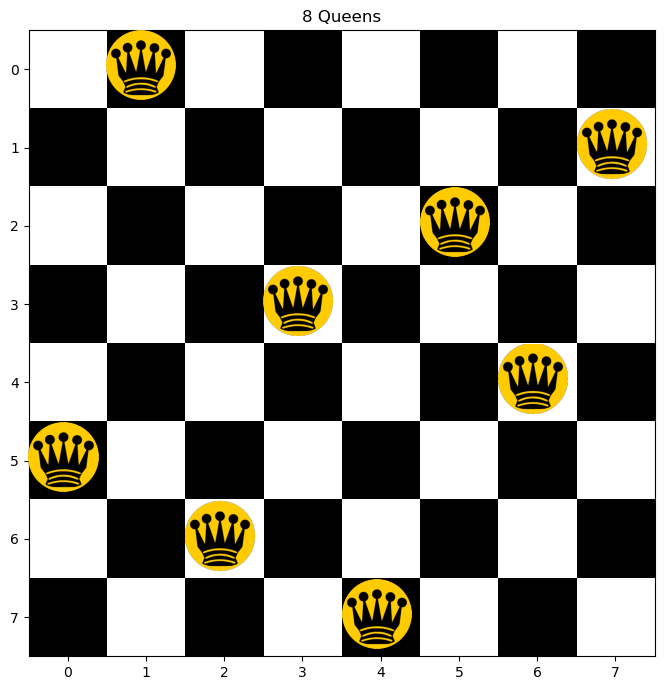

In [53]:
def hill_climbing_steps(problem, max_iter=1000):
    """
    Perform hill climbing to solve the N-Queens problem.
    
    Args:
    - problem: The initial state of the N-Queens problem.
    - max_iter: Maximum number of iterations.
    
    Returns:
    - states_explored: List of states explored during hill climbing.
    """
    states_explored = []  # List to store all states explored during hill climbing
    current_state = problem  # Initialize with the provided initial state
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        states_explored.append(current_state.copy())  # Add current state to the list
        if current_conflicts == 0:
            return states_explored  # Found the solution
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_states_with_conflicts.sort(key=lambda x: x[1])  # Sort by number of conflicts
        best_next_state, best_next_state_conflicts = next_states_with_conflicts[0]
        if best_next_state_conflicts >= current_conflicts:
            return states_explored  # Local minimum found
        current_state = best_next_state  # Move to the best neighbor
    return states_explored

random.seed(42)  # You can replace 42 with any integer value

# Generate the initial state using the random seed
initial_state = [random.randint(0, 7) for _ in range(8)]

# Perform hill climbing and get all states explored
states_explored = hill_climbing_steps(initial_state)

# Plot all states explored
for i, state in enumerate(states_explored):
    plot_NQueens(state)

C:\Users\gamer\AppData\Local\Temp\ipykernel_2684\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


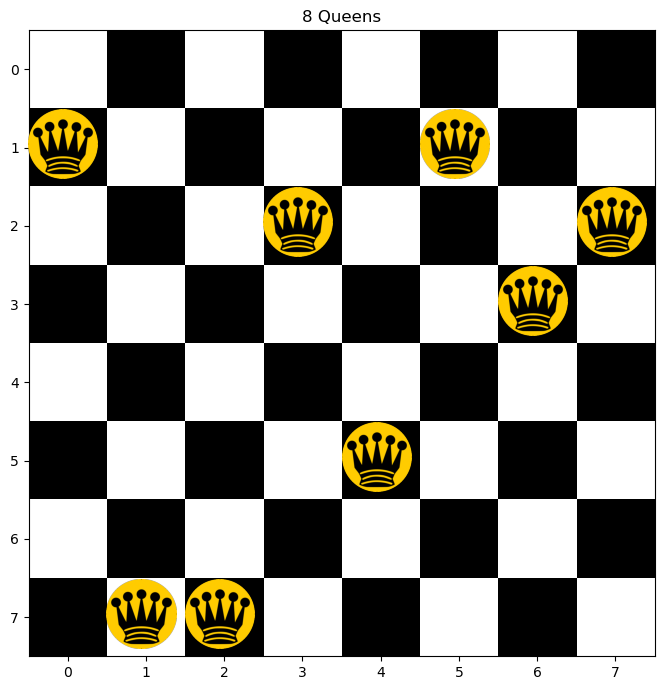

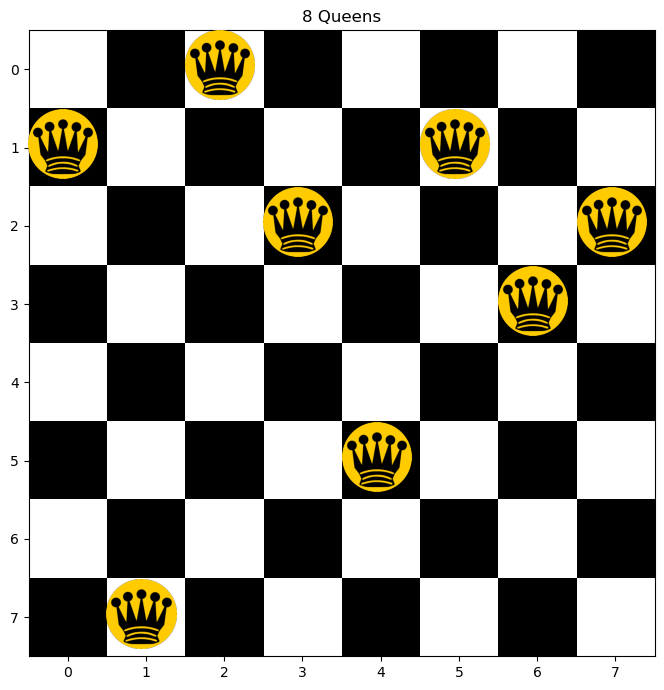

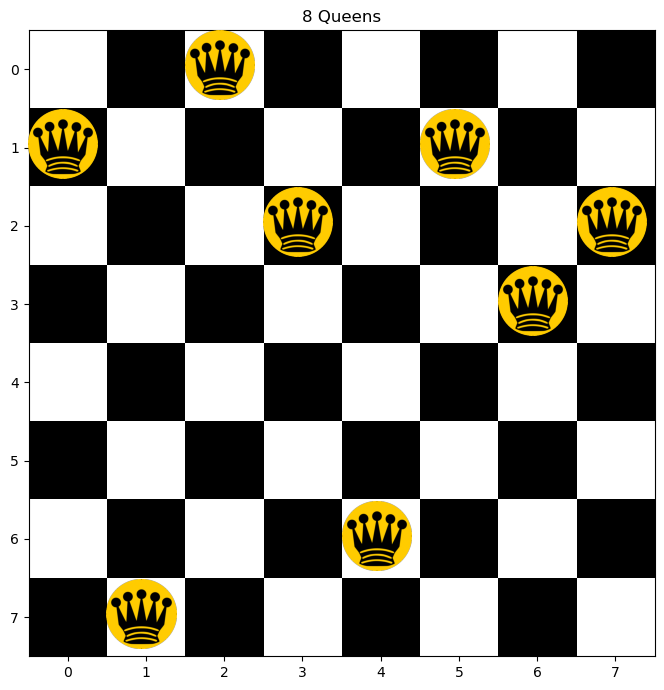

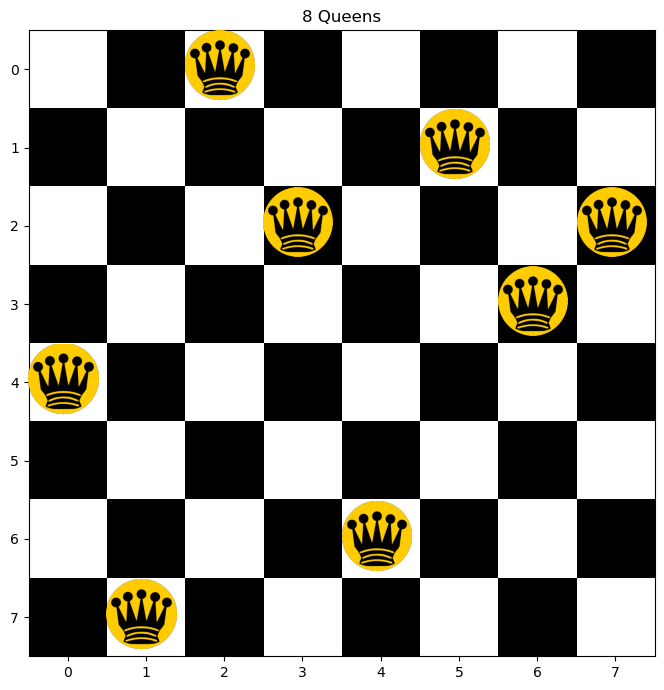

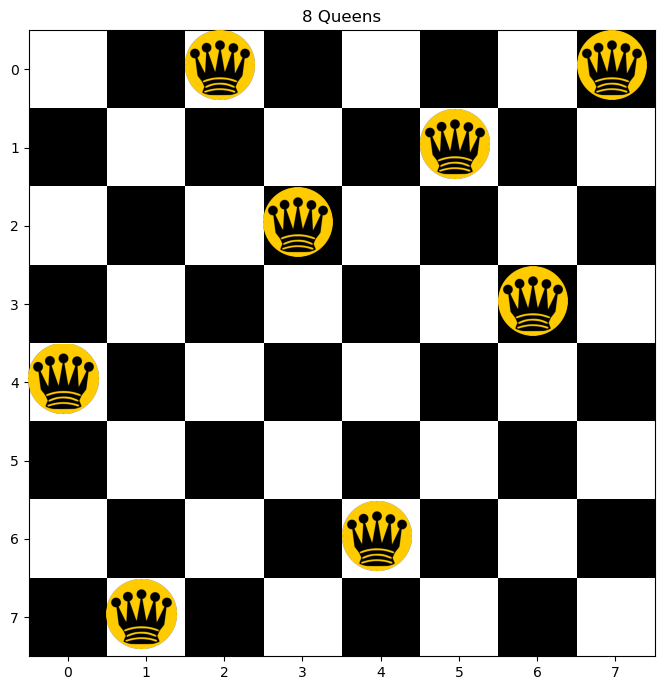

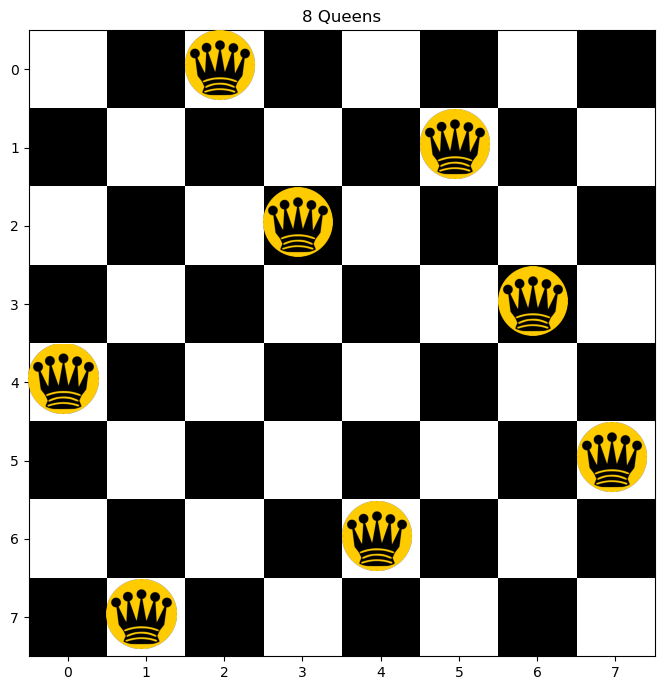

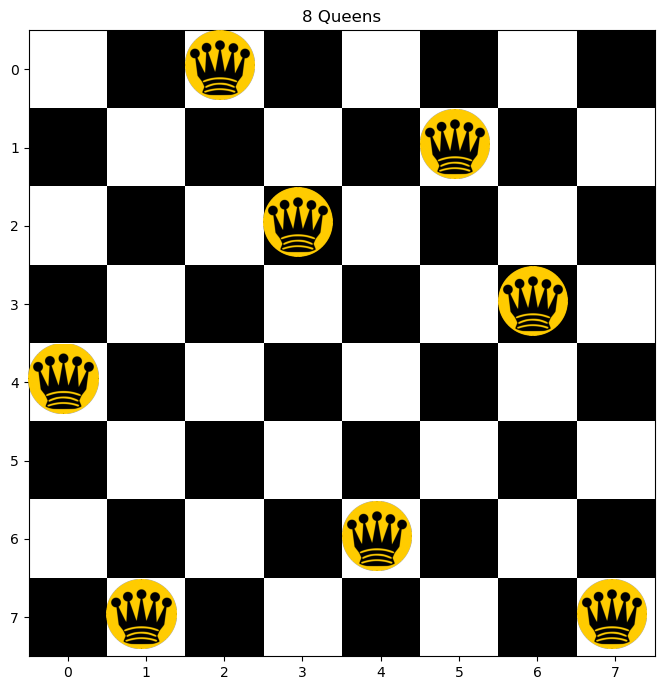

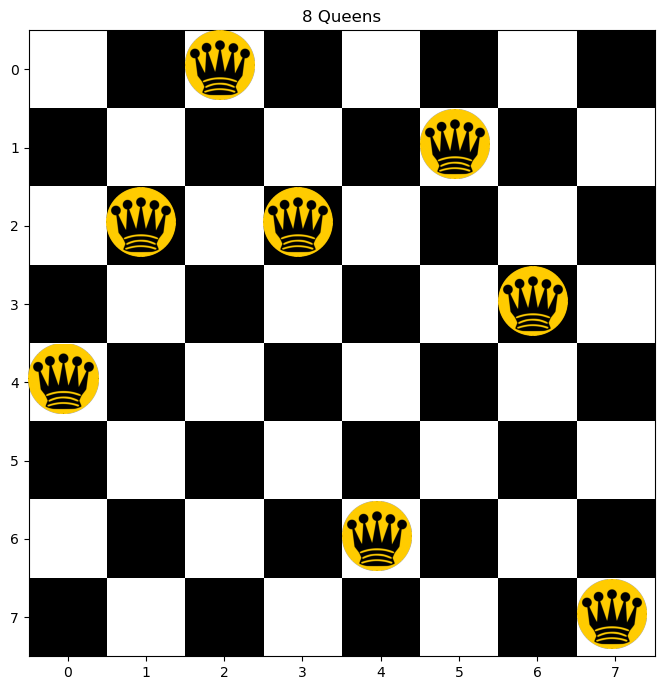

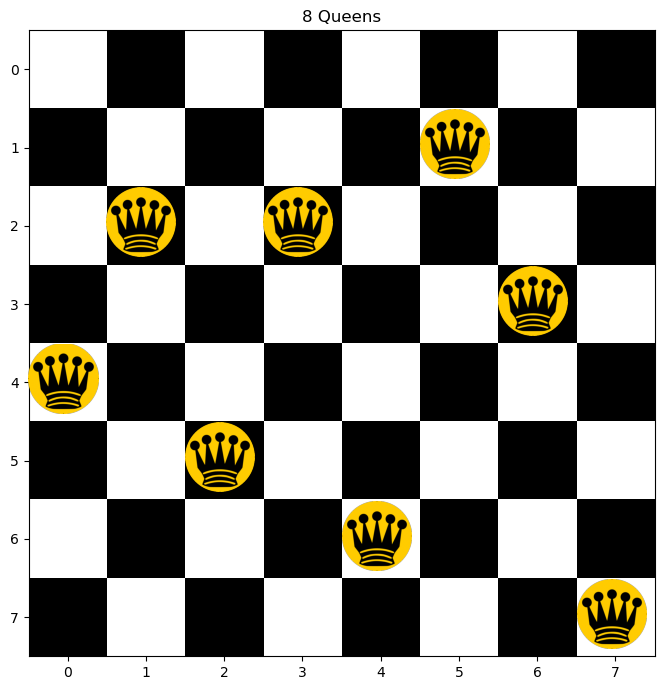

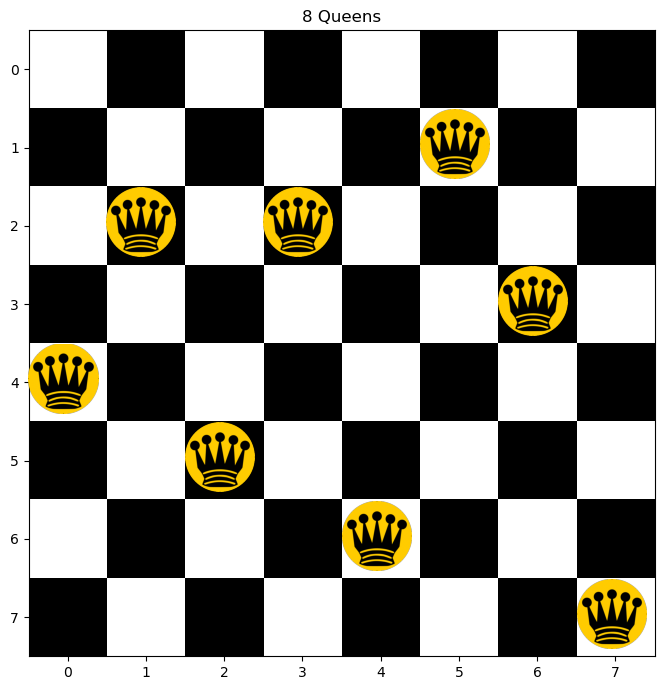

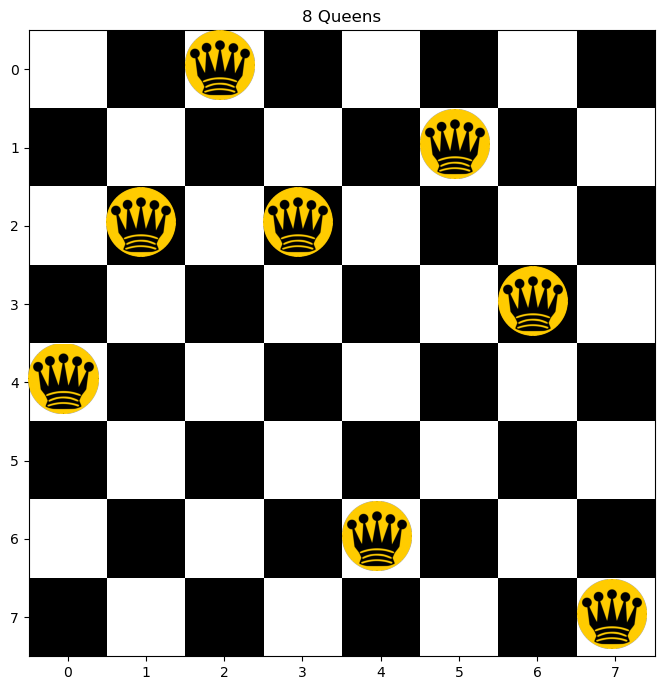

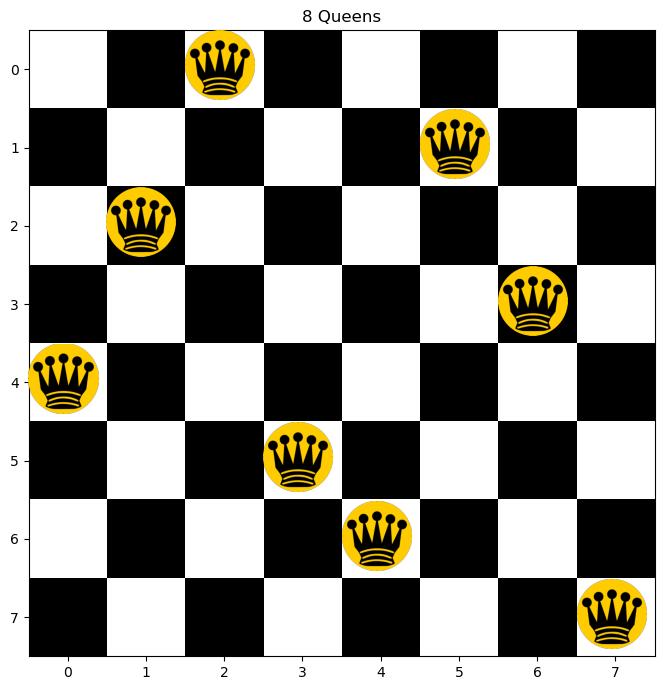

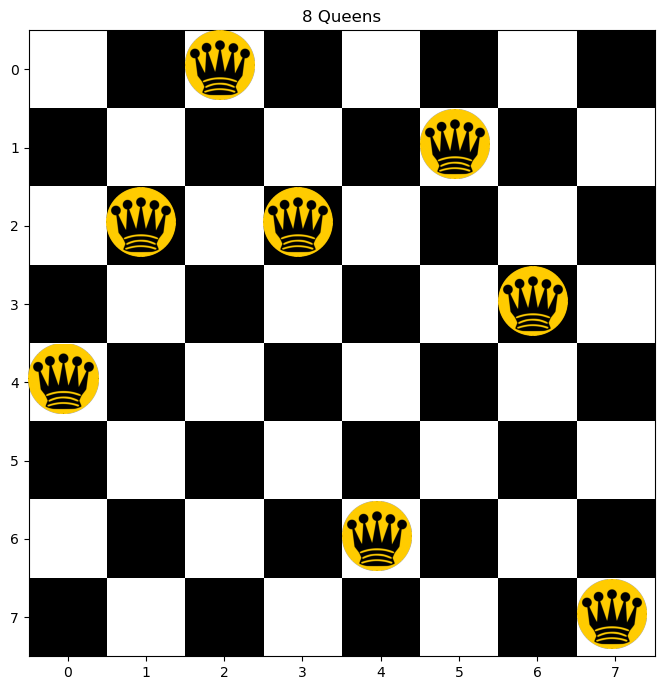

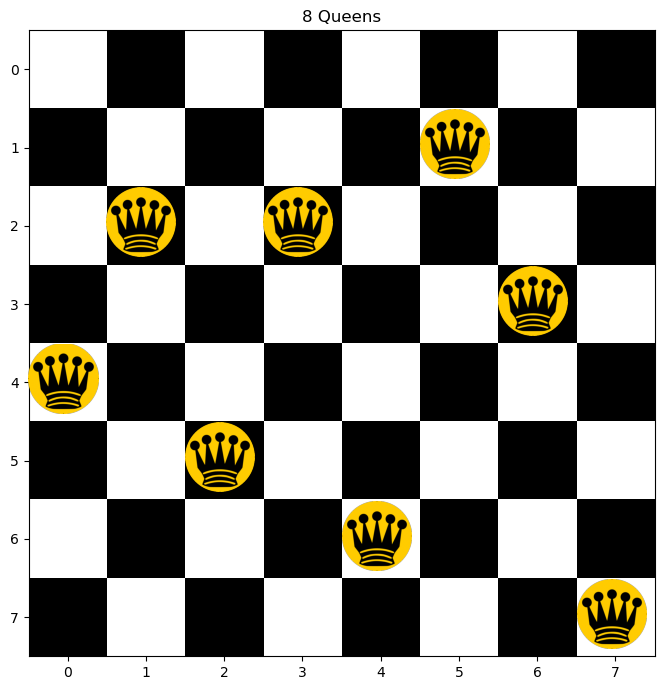

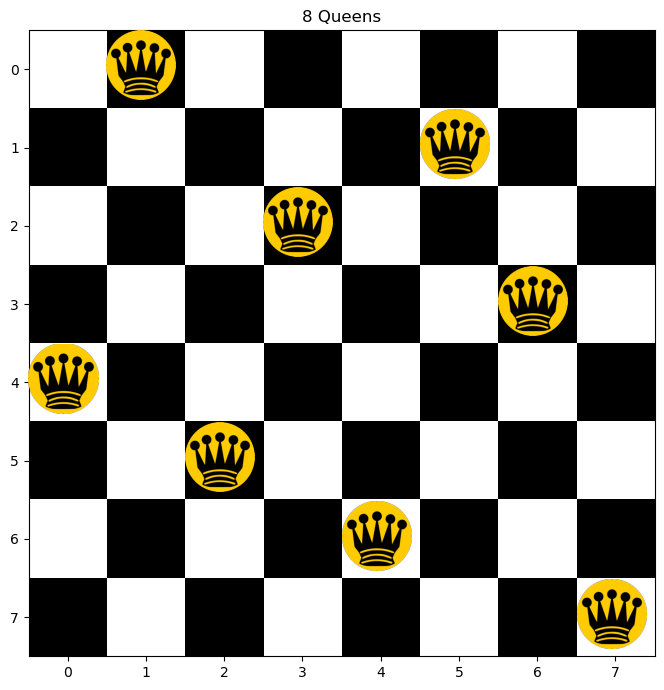

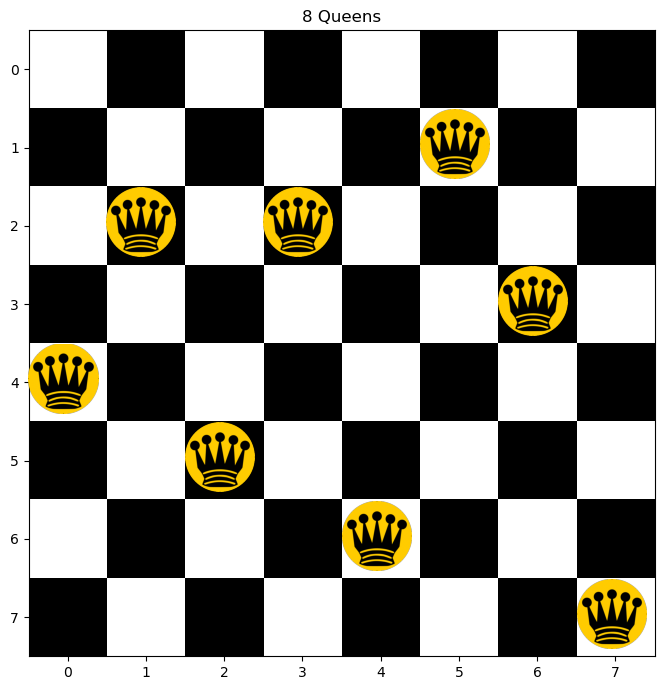

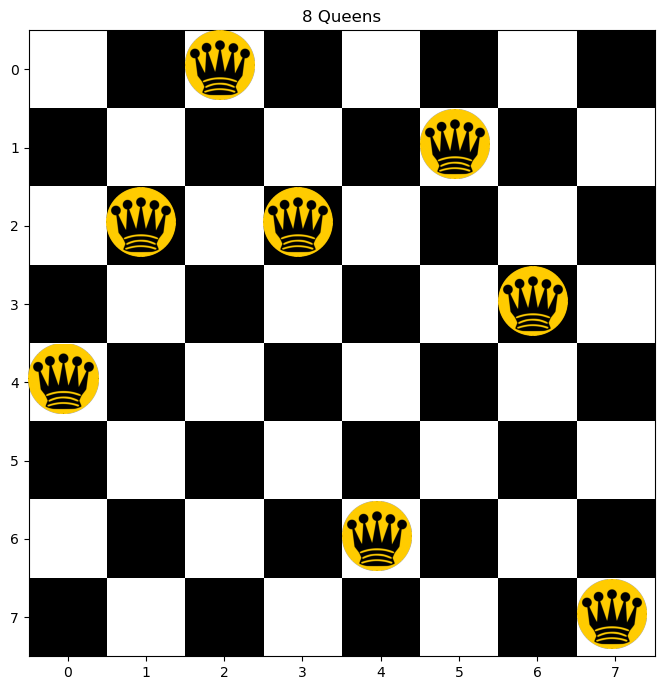

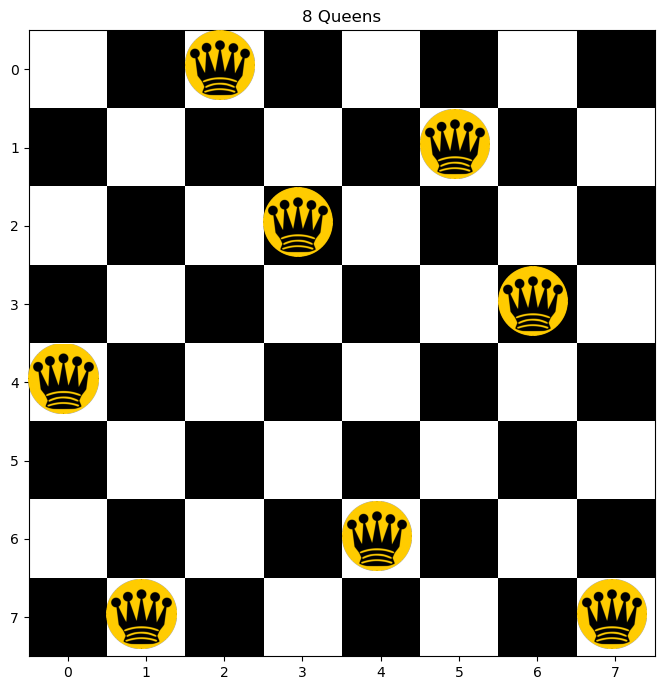

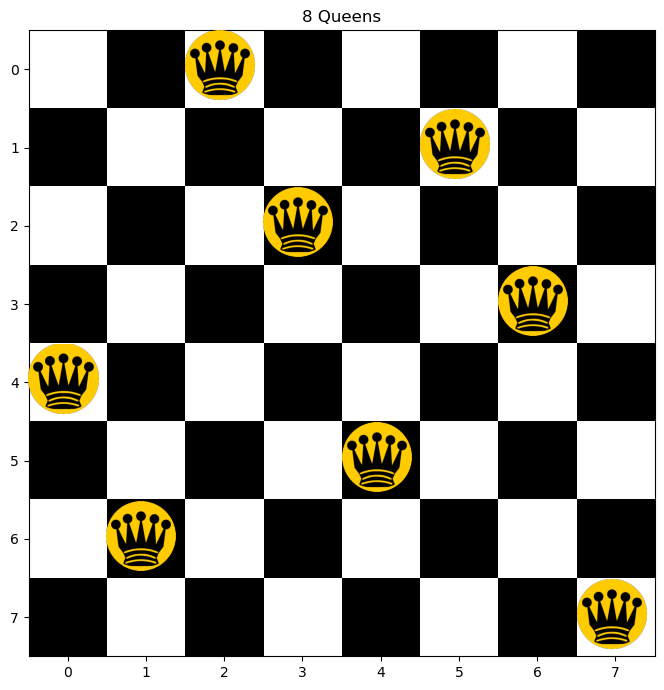

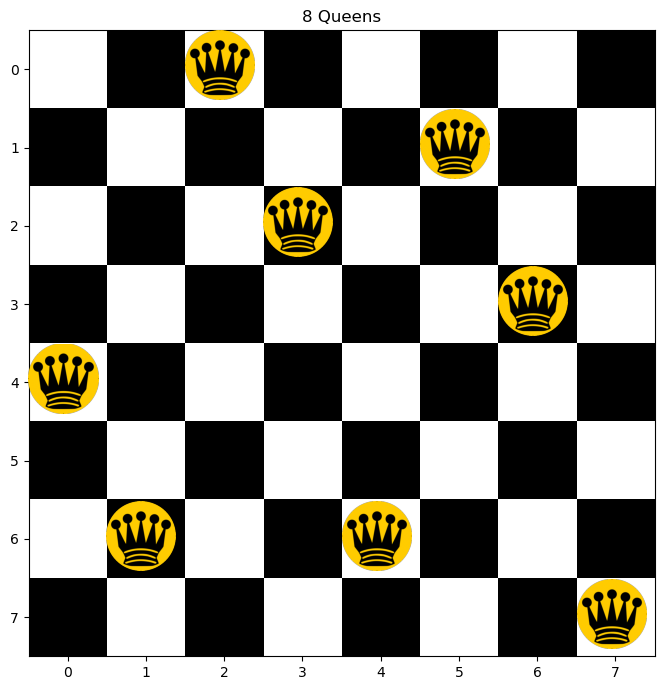

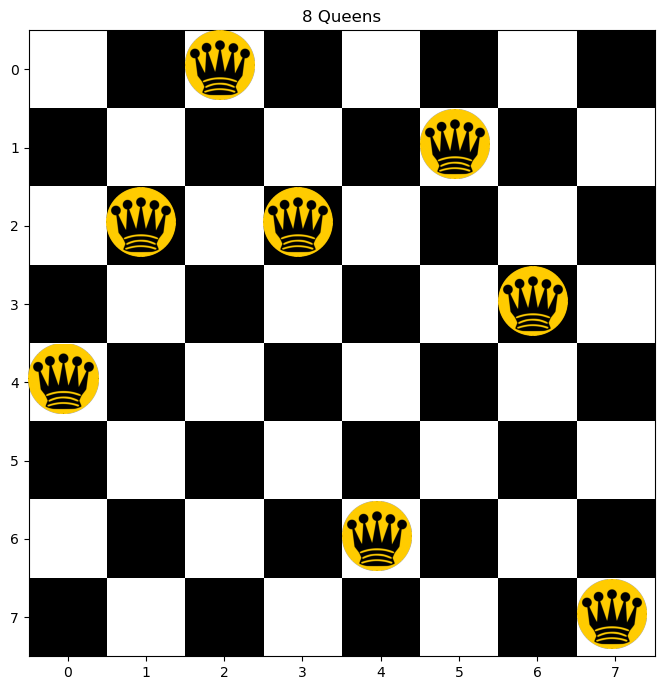

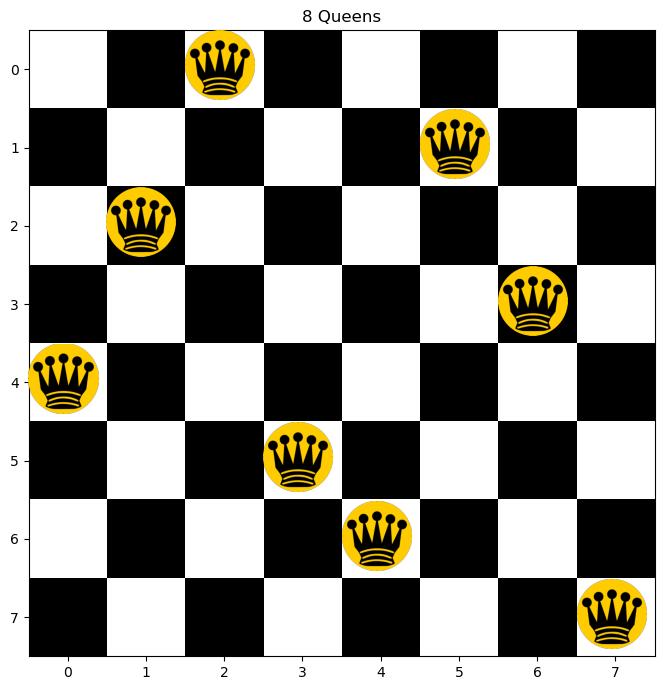

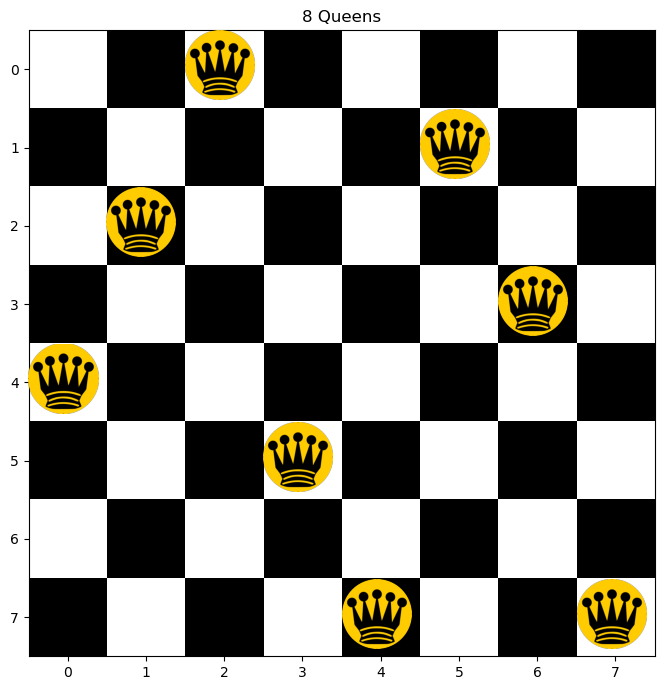

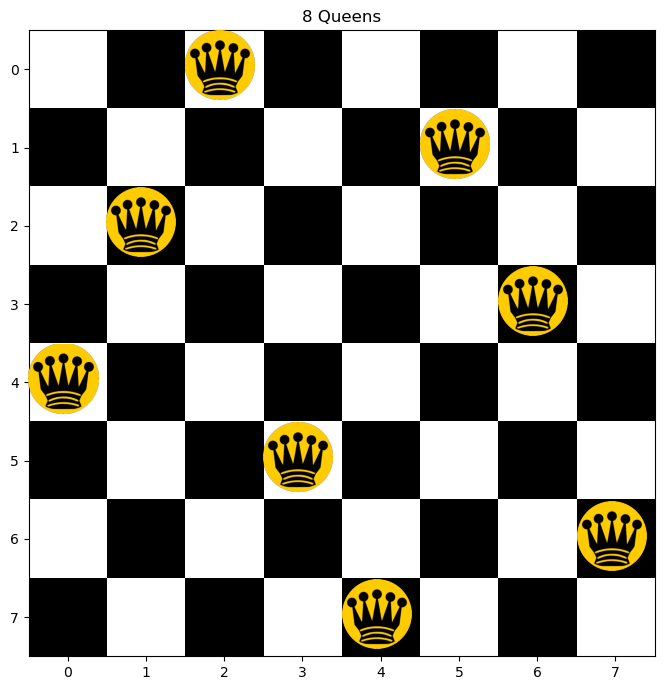

In [46]:
def stochastic_hill_climbing_steps(initial_state, max_iter=1000):
    """
    Perform stochastic hill climbing to solve the N-Queens problem.

    Args:
    - initial_state: The initial state of the N-Queens problem.
    - max_iter: Maximum number of iterations.

    Returns:
    - states_explored: List of states explored during stochastic hill climbing.
    """
    states_explored = []  # List to store all states explored during hill climbing
    current_state = initial_state[:]  # Initialize with the provided initial state
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        states_explored.append(current_state.copy())  # Add current state to the list
        if current_conflicts == 0:
            return states_explored  # Found the solution
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_states_with_conflicts.sort(key=lambda x: x[1])  # Sort by number of conflicts
        best_next_state, best_next_state_conflicts = next_states_with_conflicts[0]
        if best_next_state_conflicts == current_conflicts:
            candidates = [s for s, c in next_states_with_conflicts if c == best_next_state_conflicts]
            current_state = random.choice(candidates)
        elif best_next_state_conflicts < current_conflicts:
            current_state = best_next_state  # Move to the best neighbor
    return states_explored

random.seed(999)  # You can replace 42 with any integer value

# Generate the initial state using the random seed
initial_state = [random.randint(0, 7) for _ in range(8)]

# Perform stochastic hill climbing and get all states explored
states_explored = stochastic_hill_climbing_steps(initial_state)

# Plot all states explored
for i, state in enumerate(states_explored):
    plot_NQueens(state)

In [49]:
def simulated_annealing_steps(n, max_iter=3000, initial_temp=1000, cooling_rate=0.95, seed=None):
    if seed is not None:
        random.seed(seed)
    
    current_state = [random.randint(0, n - 1) for _ in range(n)]  
    current_temp = initial_temp
    
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        if current_conflicts == 0:
            return [current_state.copy()]  # Found the solution, return it as a single-element list
        
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_state, next_conflicts = random.choice(next_states_with_conflicts)
        
        delta_E = next_conflicts - current_conflicts
        acceptance_prob = np.exp(-delta_E / current_temp)
        
        if delta_E < 0 or random.random() < acceptance_prob:
            current_state = next_state
            
        current_temp *= cooling_rate

    return []  # Return an empty list if no solution is found within max_iter iterations



# Set the number of queens
n = 8
seed_value = 999

# Perform simulated annealing with the specified seed
states_explored = simulated_annealing_steps(n, seed=seed_value)

# Plot all states explored
for i, state in enumerate(states_explored):
    plot_NQueens(state)

C:\Users\gamer\AppData\Local\Temp\ipykernel_2684\303799433.py:18: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-delta_E / current_temp)
C:\Users\gamer\AppData\Local\Temp\ipykernel_2684\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


* To see all the steps of simulated annealing: